# Regression Analysis

## Linear Regression
Fit a line to a data set of observations, use this line to predict unobserved values.
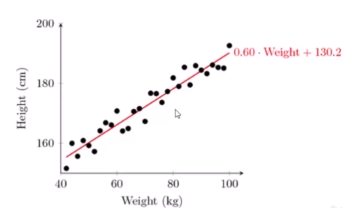

### How does it work?
Minimizes the squared-error between aach point and the line, A.K.A "least squares".
Automatically done by Python itself.
Sometimes called "Maximum likelihood estimation". Basically means how likely something is to be predicted.
Gradient descent is an alternative to least squares.
### Measuring error with r-squared
Measures the fraction of the total variation in y that's captured by the model.
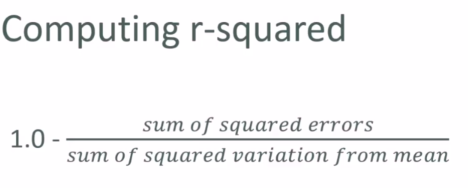

Measures from 0 to 1, 0- bad, 1- good fit.



# Polynomial Regression

1. Not all relationships are linear.
2. The higher order we get, the more complex relationships we can get.
3. More degrees isn't always better, overfitting can be a problem.

# Multiple regression
1. When we do a regression that has many features and uses more than one variable.

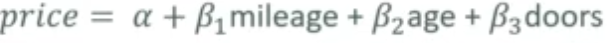

2. Still uses least squares.
3. If the data is normalized, the coefficients imply how important each factor is.
4. Assumes that there's no dependency between the features.



## Multi-level Models

1. We must identify the factors that impact the outcome we're trying to predict. 
2. These factors can be found in multiple levels such as when modeling something like crime, where data can be pulled from state, Municipal and Federal levels.

## Machine Learning with Python

### Unsupervised learning
1. Not giving the model any answers to learn from. We let the model decide which categories an object belongs to.
2. We don't know what the model is going to decide.
3. Can be used to find clusters of traits we didn't know were there.
### Supervised learning
1. The data used by the algorithm has a set of complete answers, and then use this labeled data to predict new values from.
2. We evaluate supervised learning by using part of the data as a training set and another for testing.
3. Both training and testing data must be large enough to contain representatives of all variations and outliers in the data.
4. The data sets must be randomly selected.
## Bayesian Methods
1. Bayesian:
 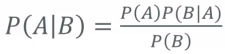
2. Is used to predict the probability of spam e-mails (for example).
3. Scikit-learn makes it easy to user. 

# K-Means Clustering
1. We have a collection of stuff and find interesting clusters of things.
2. Try to split our data ińto K groups (K is the number of groups), by the closes K centroids.
3. Unsupervised learning.
4. can uncover interesting behaviours.


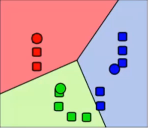

Initialize k means with random values
--> For a given number of iterations:
    
    --> Iterate through items:
    
        --> Find the mean closest to the item by calculating 
        the euclidean distance of the item with each of the means
        
        --> Assign item to mean
        
        --> Update mean by shifting it to the average of the items in that cluster

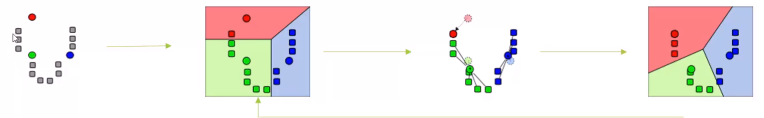

## K-Means Clustering issues
1. Choosing K. At some point there's less reduction in the squared error.
2. The random choice of initial centroids can produce different results.
3. It doesn't assign any meaning to clusters we find; only tells that the data is related.

# Measuring Entropy
1. Entropy is the measurement of disorder. How similar od not something is.
2. The different something is to another, bigger the entropy.

## Computing Entropy
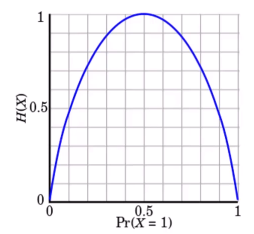
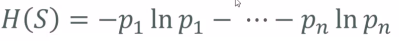
1. P represents the proportion of the data.


# Graphviz
sudo apt install graphviz

## Decision tree
1. A decision tree is created based on the labeled provided data, which is analysed by the model and used to make a flowchart that predicts the best decision.
2. At each step, we find the attribute we can use to partition the data set to minimize the entropy at the next step.
3. Might not result in the optimal tree.
4. ID3 algorithm.

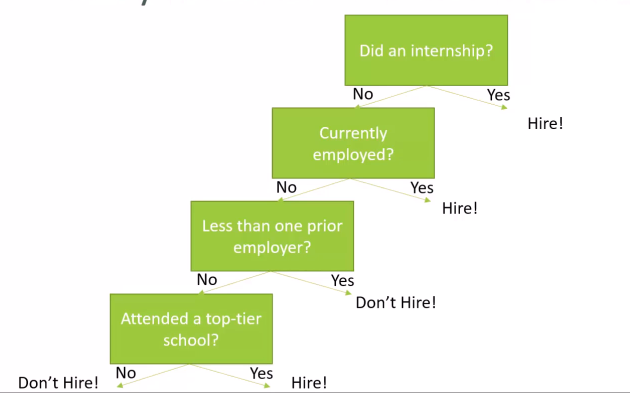

## Problems with decision tree
1. Susceptible to overfitting. We randomly re-sample the input data for each tree. (bootstrap aggregating).

In [18]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "PastHires.csv"
df = pd.read_csv(input_file, header=0)

In [19]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [20]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS':1, 'PhD':2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [21]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [22]:
#Creates a decision tree
y=df['Hired']
x=df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)

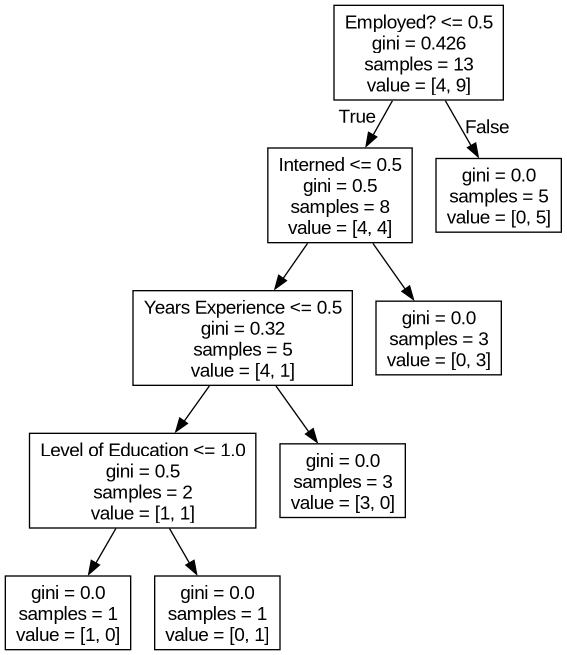

In [23]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# had to use a comma after graph, otherwise I got an Error.

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf=clf.fit(x.values,y)
print(clf.predict([[10,1,4,0,0,0]]))
print(clf.predict([[10,0,4,0,0,0]]))

[1]
[0]


# Error: 
UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature name
## Solution:
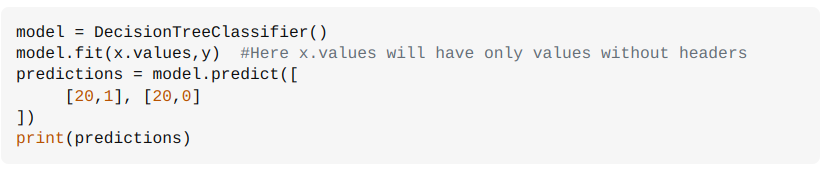
[Solution source](https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0)

# XGBoost
## xtreme gradient boosted trees
1. Multiple trees that build on each other to correct the errors of the previous.
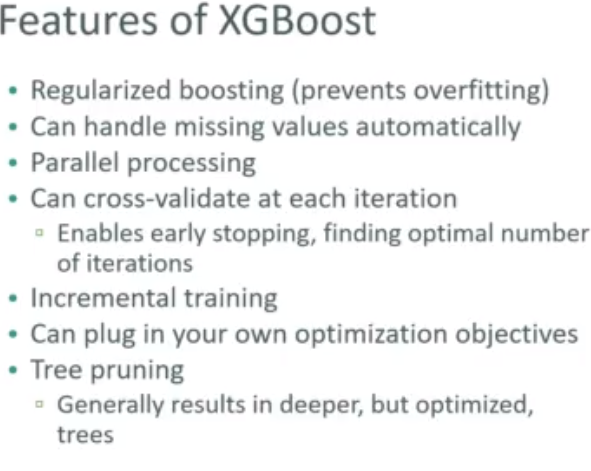

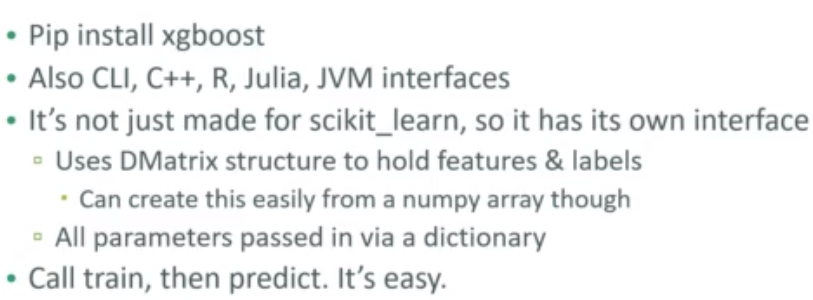

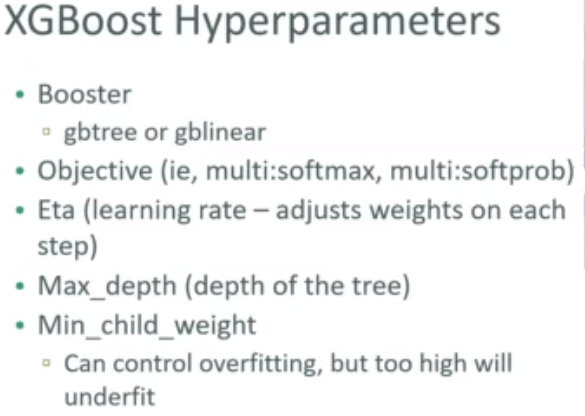

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()
numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [31]:
#150 samples, 4 features from iris dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

x -> feature data
y -> label data

feature data goes into x_train/x_test and labels go to y_train/y_test

In [51]:
import xgboost as xgb
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [94]:
param = {
    'max_depth':1,
    'eta':0.10,
    'objective':'multi:softmax',
    'num_class':3}
epochs = 10
#epochs = 1
#epochs = 100


In [95]:
#train the model
model = xgb.train(param, train, epochs)

In [96]:
#softmax classification with maximum probability

In [97]:
predictions = model.predict(test)

In [98]:
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [99]:
#prints the category numbers of the individual flowers in the data point of the test data that the model never saw before.

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

# Personal Tinkering
1. with max_depth at 2, accuracy drops.
2. Reducing ETA and epochs also drop the accuracy a bit, but no so much it appears. 

# Suppor Vector Machines

1. 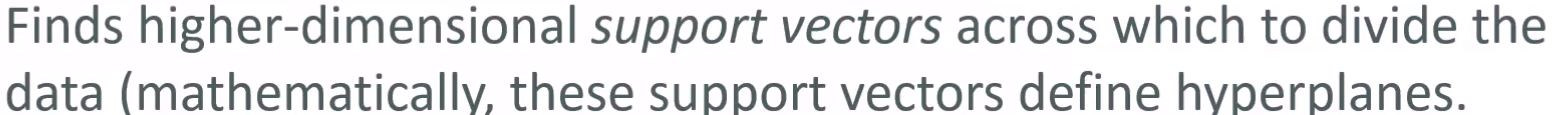
2. 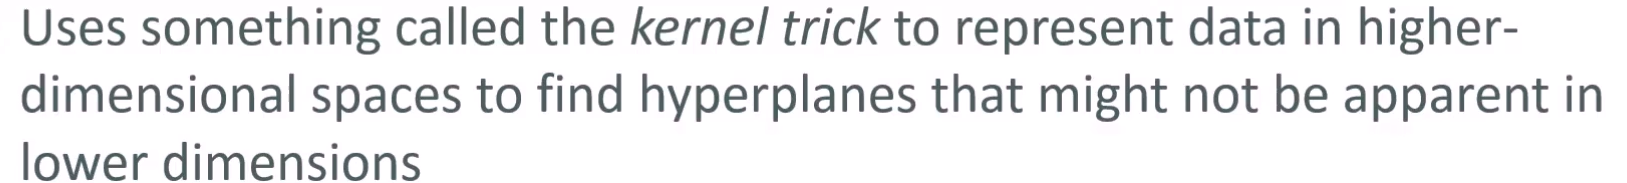


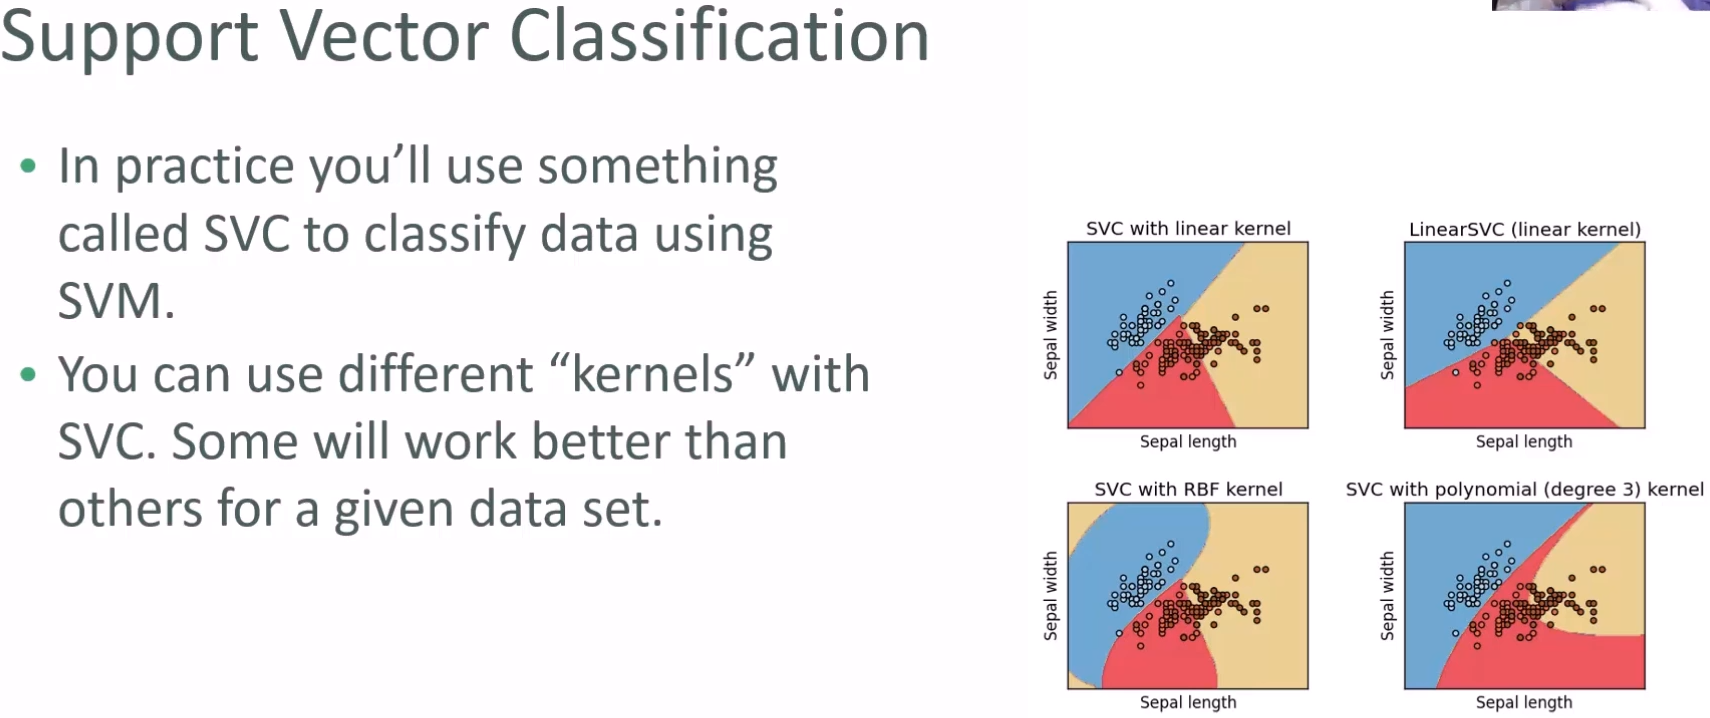
